In [4]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

In [12]:
benchmark_path = "../benchmarks/sparse/d1"

In [45]:
from longestpath import gen_num_edges
from benchmarking import new_benchmark
from longestpath.solvers import Solver
import inspect

def generate():
    degree = 1.5
    return [
        gen_num_edges(n, round(n * degree))
            for n in list(range(10, 100, 10)) + list(range(100, 2050, 50)) for _ in range(5)
    ]

params_code = inspect.getsource(generate)
graphs = generate()

benchmark = new_benchmark(graphs, solvers=[
	Solver("brute", "BRANCH_N_BOUND"),
    Solver("brute", "BRUTE_FORCE"),
    Solver("brute", "FAST_BOUND"),
	Solver("ilp"),
], params_code = params_code, override_benchmark_path=benchmark_path)

In [8]:
from benchmarking import Benchmark

benchmark = Benchmark.load(benchmark_path)

# benchmark.add_solver(Solver("brute", "FAST_BOUND"))

benchmark.run(timeout=60*10, solver_indices=[4])

In [37]:
df = benchmark.get_dataframe()
df

,path,run_time,length,solver,graph_id,failure,solver_name,vertices,edges,average_out_degree
0,"[0, 9, 2, 8, 3, 4, 6, 1]",0.000004,7.0,1,0,NaN,brute('BRUTE_FORCE'),10,20,2.0
1,"[6, 3, 9, 0, 1, 4, 5, 8, 7, 2]",0.000009,9.0,1,1,NaN,brute('BRUTE_FORCE'),10,20,2.0
2,"[1, 4, 9, 7, 3, 0, 6, 5, 2, 8]",0.000003,9.0,1,2,NaN,brute('BRUTE_FORCE'),10,20,2.0
3,NaN,0.452684,NaN,1,3,interrupted,brute('BRUTE_FORCE'),10,20,2.0
4,"[0, 9, 2, 8, 3, 4, 6, 1]",0.000008,7.0,0,0,NaN,brute('BRANCH_N_BOUND'),10,20,2.0
...,...,...,...,...,...,...,...,...,...,...
106,"[62, 64, 134, 119, 65, 131, 89, 51, 37, 59, 2,...",22.791841,80.0,3,51,NaN,brute('FAST_BOUND'),150,300,2.0
107,NaN,60.000000,NaN,3,52,timeout,brute('FAST_BOUND'),150,300,2.0
108,NaN,60.000000,NaN,3,53,timeout,brute('FAST_BOUND'),150,300,2.0
109,"[73, 68, 109, 35, 13, 6, 1, 94, 36, 10, 100, 1...",50.753513,72.0,3,54,NaN,brute('FAST_BOUND'),150,300,2.0


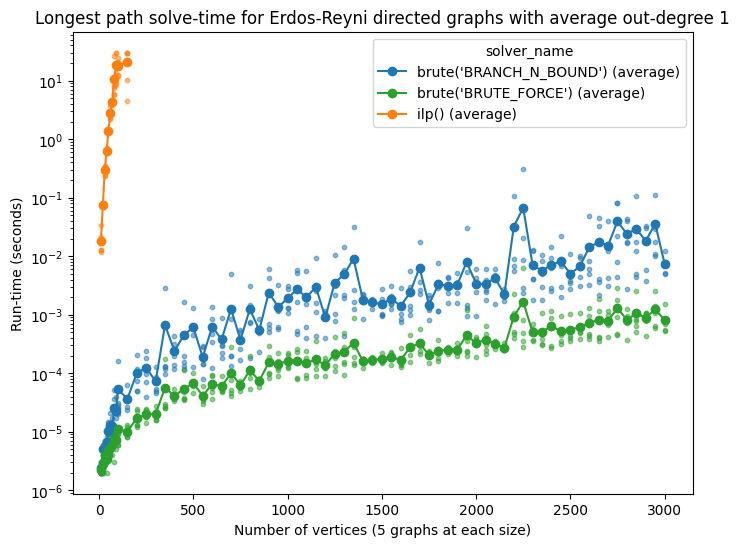

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from benchmarking import Benchmark

benchmark = Benchmark.load(benchmark_path)
df = benchmark.get_dataframe()

colors = mcolors.TABLEAU_COLORS
colordict = dict(zip(benchmark.solver_names(), colors))
colordict = {**colordict, **{solver_name + " (average)": color for solver_name, color in colordict.items()}}

to_plot = df.groupby(['vertices', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
    .pivot(index='vertices', columns='solver_name', values='run_time') \
    .rename(columns=lambda x: x + " (average)");

to_plot.plot(style="o-", color=colordict)

for solver_name in benchmark.solver_names():
    solver_df = df[df["solver_name"] == solver_name]
    plt.scatter(solver_df['vertices'], solver_df['run_time'], label=None, color=colordict[solver_name], alpha=0.5, s=10)

plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("Run-time (seconds)")
plt.xlabel("Number of vertices (5 graphs at each size)")
degree = 1
plt.title(f"Longest path solve-time for Erdos-Reyni directed graphs with average out-degree {degree}")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.gcf().set_size_inches(8, 6)

plt.savefig(os.path.join(benchmark.benchmark_path, "sparse_d1.png"), dpi=400, bbox_inches='tight')

In [11]:
colors = mcolors.TABLEAU_COLORS
colordict = dict(zip(benchmark.solver_names(), colors))
colordict

{"brute('BRANCH_N_BOUND')": 'tab:blue',
 "brute('BRUTE_FORCE')": 'tab:orange',
 "brute('FAST_BOUND')": 'tab:green',
 'ilp()': 'tab:red'}